In [367]:
import pandas as pd
#Reading csv file into a dataframe
df = pd.read_csv('DataB.csv')
#Get the last column in another variable
gndColumn = df['gnd']
#Removing unnecessary columns
df = df.loc[:, ~df.columns.isin(['Unnamed: 0', 'gnd'])]
#Visualizing top rows of data file after dropping columns
df.head()

,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,fea.10,...,fea.775,fea.776,fea.777,fea.778,fea.779,fea.780,fea.781,fea.782,fea.783,fea.784
0,4,4,3,0,0,4,2,1,4,1,...,1,1,3,0,4,2,1,1,4,5
1,5,1,4,3,1,3,5,1,4,4,...,3,1,1,3,3,1,3,3,5,4
2,1,3,0,3,1,1,0,1,0,2,...,4,3,0,2,4,2,2,1,2,4
3,5,3,2,3,5,2,2,0,4,5,...,4,5,4,5,1,4,4,2,4,4
4,3,5,3,3,0,4,1,1,4,3,...,1,1,3,3,3,1,2,4,1,1


Step 1 of PCA is to normalize the sample matrix
In our case, the sample matrix is n x d where n=2066 and d=784.

To normalize we use, a sample 


Xij = Xij - mean(Xj) where i ranges from 1 to n and j ranges from 1 to d

In [368]:
#Normalize by subtracting mean
df = df - df.mean()

#Visualizing top rows of data file after dropping columns
df.head()

,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,fea.10,...,fea.775,fea.776,fea.777,fea.778,fea.779,fea.780,fea.781,fea.782,fea.783,fea.784
0,1.491772,1.452565,0.539206,-2.496612,-2.472894,1.509681,-0.486447,-1.512585,1.477735,-1.482091,...,-1.517909,-1.469506,0.477251,-2.486447,1.550339,-0.498064,-1.525653,-1.54211,1.59971,2.480639
1,2.491772,-1.547435,1.539206,0.503388,-1.472894,0.509681,2.513553,-1.512585,1.477735,1.517909,...,0.482091,-1.469506,-1.522749,0.513553,0.550339,-1.498064,0.474347,0.45789,2.59971,1.480639
2,-1.508228,0.452565,-2.460794,0.503388,-1.472894,-1.490319,-2.486447,-1.512585,-2.522265,-0.482091,...,1.482091,0.530494,-2.522749,-0.486447,1.550339,-0.498064,-0.525653,-1.54211,-0.40029,1.480639
3,2.491772,0.452565,-0.460794,0.503388,2.527106,-0.490319,-0.486447,-2.512585,1.477735,2.517909,...,1.482091,2.530494,1.477251,2.513553,-1.449661,1.501936,1.474347,-0.54211,1.59971,1.480639
4,0.491772,2.452565,0.539206,0.503388,-2.472894,1.509681,-1.486447,-1.512585,1.477735,0.517909,...,-1.517909,-1.469506,0.477251,0.513553,0.550339,-1.498064,-0.525653,1.45789,-1.40029,-1.519361


In [376]:
import numpy as np
#Get the data in a matrix
A = np.matrix(df)
#Creating covariance matrix by using transpose matrix
covarianceMatrix = np.cov(A.transpose())
#Calculate the eigenvectors and eigenvalues
eigenValue, eigenVector = np.linalg.eig(covarianceMatrix)
#Considering first 2 columns of the eigenvector
eigenVectors12 = np.take(eigenVector, [0, 1], axis=1)
#Input is projected on the first 2 PCs and taking transpose:
projection12 = np.matmul(eigenVectors12.T,A.T).transpose()
#Create a dataframe PrincipalComponent12 with 3 columns consisting of the first 2 PCs and gnd column
PrincipalComponent12 = pd.DataFrame(projection12, columns=['PCA Principal Component 1', 'PCA Principal Component 2']).assign(gndColumn=gndColumn.values)
#Visuallize the dataframe PrincipalComponent12
PrincipalComponent12.head(10)

      PCA Principal Component 1  PCA Principal Component 2  gndColumn
0                   1069.166304                 513.973184          0
1                   1099.176077                 570.842223          0
2                    673.201385                 167.377150          0
3                   1010.903339                 187.044145          0
4                   1692.970822                 633.369398          0
...                         ...                        ...        ...
2061                 -24.355662                -742.490057          4
2062                  48.768593                -734.458335          4
2063                 131.021601                -866.607035          4
2064                -262.141229                -652.777351          4
2065                -480.891094                -432.743142          4

[2066 rows x 3 columns]


<Axes: xlabel='PCA Principal Component 1', ylabel='PCA Principal Component 2'>

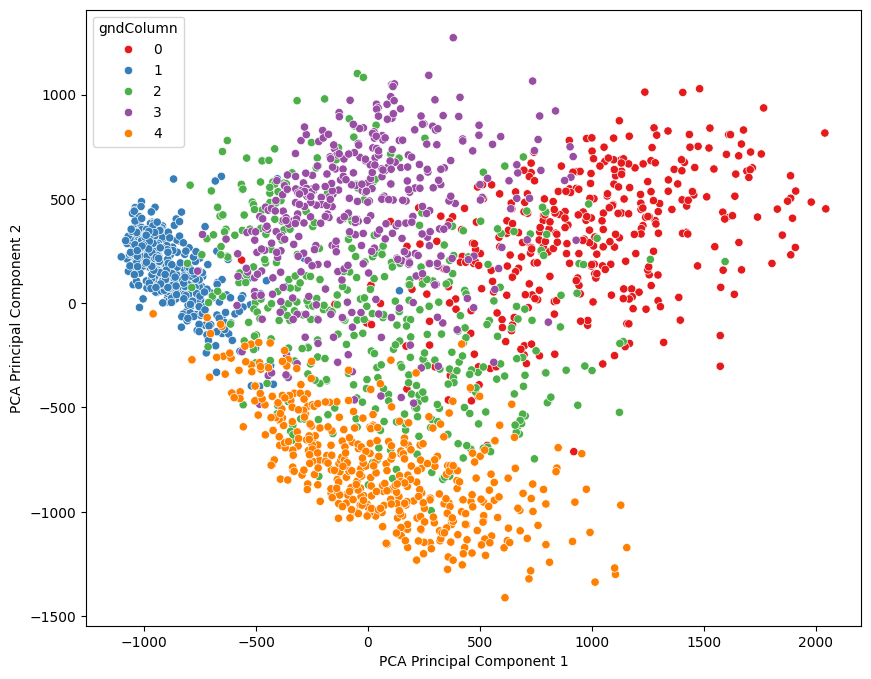

In [370]:
#importing for visualizing data and plotting 
import matplotlib.pyplot as plt
import seaborn as sns

#Setting the plot size and axes
fig = plt.figure(figsize=(10, 8))

#Scatterplot with predefined set of colours
sns.scatterplot(x = "PCA Principal Component 1", y = "PCA Principal Component 2", data = PrincipalComponent12, palette = 'Set1', hue = "gndColumn")

2. We can see that using PCA and the first and second Principal components which contain the maximum variance helps to distinguish between the various classes. The classes have been set to different colours to show the variation. We were successfully able to linearly transform the data to 2 dimensions. We also note that classes corresponding to red, blue and orange are more separated. Classes represented by purple and green are much more similar to each other than the other classes because of which they appear more superimposed on each other.

In [371]:
#Considering the fifth and sixth columns of the eigenvector
eigenVectors56 = np.take(eigenVector, [4, 5], axis=1)
#Input is projected on the first 2 PCs and taking transpose:
projection56 = np.matmul(eigenVectors56.T,A.T).transpose()
#Create a dataframe PrincipalComponent56 with 3 columns consisting of the 5th and 6th PCs and gnd column
PrincipalComponent56 = pd.DataFrame(projection56, columns=['PCA Principal Component 5', 'PCA Principal Component 6']).assign(gndColumn=gndColumn.values)
#Visuallize the dataframe PrincipalComponent56
PrincipalComponent56.head(10)

,PCA Principal Component 5,PCA Principal Component 6,gndColumn
0,-387.873484,-335.304982,0
1,-345.573249,-530.737220,0
2,-1036.833666,76.531663,0
3,-901.897549,73.661148,0
4,6.919257,-601.851221,0
5,577.933576,140.191582,0
6,-680.648563,-501.999433,0
7,1017.001492,-87.023369,0
8,-722.007449,195.983302,0
9,-761.675828,-435.396163,0


<Axes: xlabel='PCA Principal Component 5', ylabel='PCA Principal Component 6'>

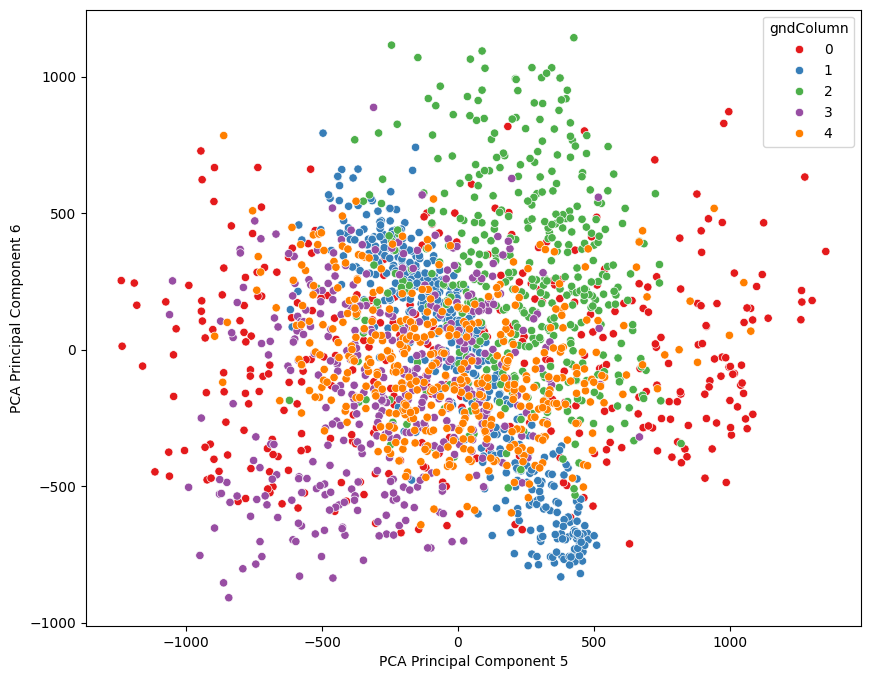

In [378]:
#Setting the plot size and axes
fig = plt.figure(figsize=(10, 8))

#Scatterplot with predefined set of colours
sns.scatterplot(x = "PCA Principal Component 5", y = "PCA Principal Component 6", data = PrincipalComponent56, palette = 'Set1', hue = "gndColumn")

3. Here, when we plot for the 5th and 6th principal component we see that the classes are not as distinguishable from each other as we had seen with principal components 1 and 2. This is because, most of the features or information of the data is stored in the initial principal components. The plot shows the different classes but they are very close and more superimposed or mixed with each other. This shows that we get more variance(distinguishing classes) from the initial principal components. To retain the largest part of variance we must focus on just the initial principal components.

The retained variance is the ratio of variance on using m components over total variance of d components.

$$
RV = \left( \sum_{i=1}^m \lambda_i \right) / \left( \sum_{i=1}^d \lambda_i \right)
$$

The retained variance in the new dimension will be higher when higher number of components are considered and will be closer to 1 or 100%

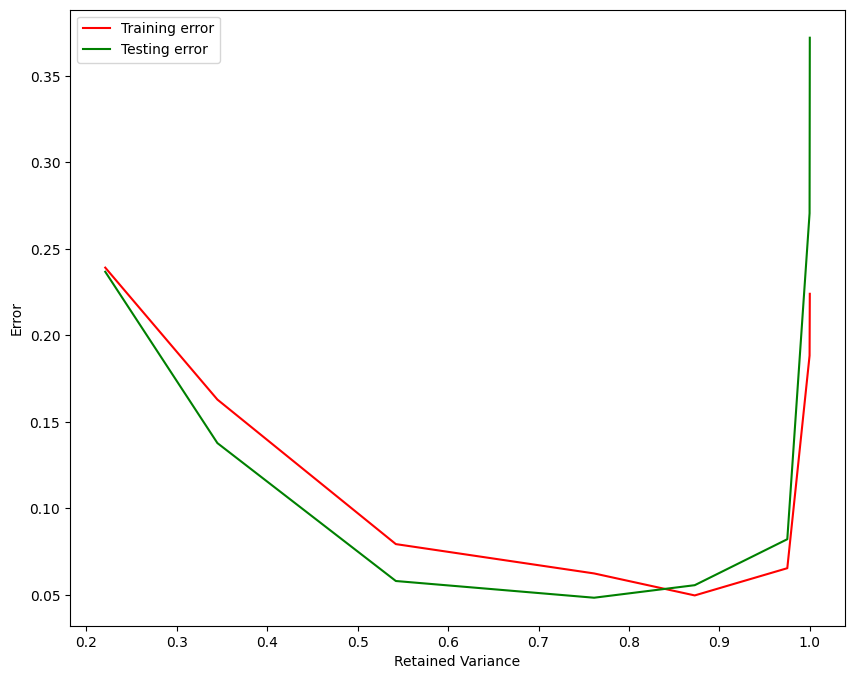

In [373]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

retainedVarList = []
testErrorList = []
trainErrorList = []
principalComponentsN = [2,4,10,30,60,200,500,784]

for i in principalComponentsN:
        #Considering first i PCs of the eigenvector
        eigenVectorsN = np.take(eigenVector, range(i), axis=1)

        #Input is projected on the first i PCs, taking transpose and get the dataframe
        PrincipalComponentN = pd.DataFrame(np.matmul(eigenVectorsN.T,A.T).transpose())

        #sum(eigenValue) gives the total variance and eigenValue[:i] gives variance because of first i components
        #The division gives the amount of variance retained when we consider first i components
        varRetained = np.divide(sum(np.take(eigenValue,range(i))),sum(eigenValue))

        #Create training and testing data
        X_train, X_test, y_train, y_test = train_test_split(PrincipalComponentN,gndColumn,random_state=39,test_size=0.2) 

        #Training data
        naiveBayesClassifier = GaussianNB().fit(X_train,y_train)

        #Get predictions for training and testing data
        y_train_pred,y_test_pred = naiveBayesClassifier.predict(X_train),naiveBayesClassifier.predict(X_test)

        #Get classification errors for training and testing data
        trainingError = (1 - accuracy_score(y_train, y_train_pred))
        testingError = (1 - accuracy_score(y_test, y_test_pred))
        retainedVarList.append(varRetained) 
        testErrorList.append(testingError)
        trainErrorList.append(trainingError)

#Expressing variance which is retained against training and testing errors in a line plot 
fig, ax = plt.subplots(figsize=(10, 8))
#Training error is indicated by red line and testing error by the green line
ax.plot(retainedVarList,trainErrorList,label='Training error',color='red')
ax.plot(retainedVarList,testErrorList,label='Testing error',color='green')
ax.legend(loc='upper left')
#Name the axes in the plot
plt.setp(ax, xlabel="Retained Variance", ylabel="Error")
#Display the plot
plt.show()

In [374]:
#Importing LDA library
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#Training the input and fitting it to 2 dimensional space by using LDA for dimensionality reduction 
LDAComponent12 = LinearDiscriminantAnalysis(n_components=2).fit_transform(df, gndColumn)
#Considering 2 LDA components
LDADataframe = pd.DataFrame(LDAComponent12,columns=['LDA Component 1','LDA Component 2']).assign(gndColumn=gndColumn.values)
LDADataframe.head(10)

,LDA Component 1,LDA Component 2,gndColumn
0,-5.277233,-2.052912,0
1,-5.913727,-1.953482,0
2,-4.154543,-0.868888,0
3,-6.728769,-2.568941,0
4,-6.977105,-2.125944,0
5,-7.043006,-2.433204,0
6,-7.529504,-1.667304,0
7,-6.380275,-1.538234,0
8,-6.530964,-2.494244,0
9,-5.257274,-2.921786,0


<Axes: xlabel='LDA Component 1', ylabel='LDA Component 2'>

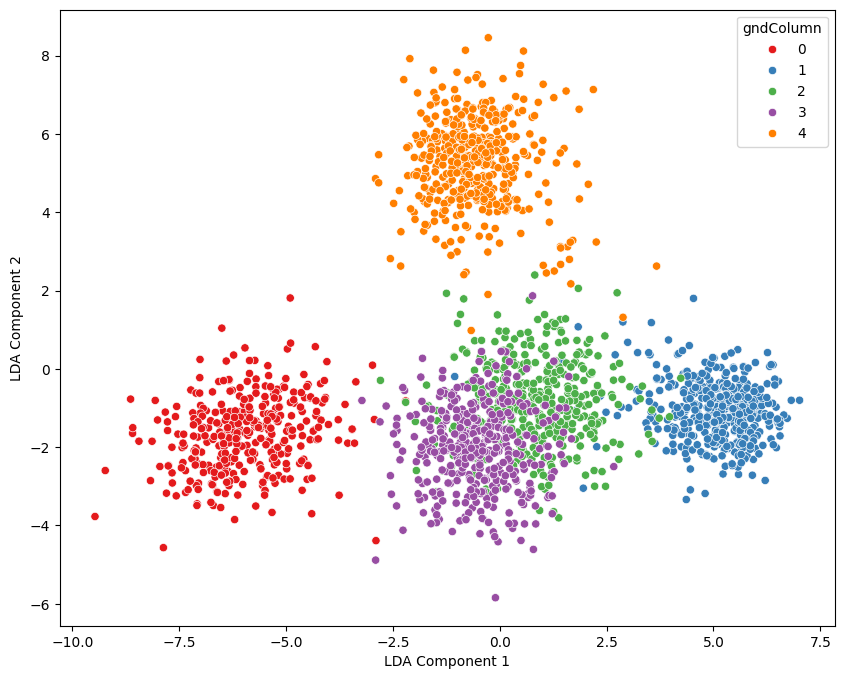

In [379]:
#Setting the plot size and axes
fig = plt.figure(figsize=(10, 8))

#Scatterplot with predefined set of colours
sns.scatterplot(x = "LDA Component 1", y = "LDA Component 2", data = LDADataframe, palette = 'Set1', hue = "gndColumn")

5. We can see that LDA is able to clearly distinguish the classes. The colours which are used to represent the different classes are separated from each other more vividly as compared to that seen in PCA with first 2 components. It is able to differentiate between the different classes except for classes that are represented with purple and green colours which are more similar to each other than other classes. LDA plot shows the classes clustered with very little overlap, showing that it obtains the variance between the classes wheras PCA obtains the variance within the input data.

6. We want to prove that PCA is the best linear method for transformation (with orthonormal bases).

    PCA uses orthonormal bases i.e. eigenvectors which are independent of each other and normalized. PCA does not require labels for linearly transforming data i.e. it is unsupervised, whereas LDA requires labels i.e. it is supervised. Also, PCA doesn't assume that the data needs to be normally distributed but linear methods like LDA needs data to be normally distributed. So, we can say that PCA is the best method as it doesn't depend on labels or data to be normally distributed. Also, PCA obtains the maximum variance within data helping to get the maximum amount of information about the data whereas other methods like LDA focus on separating the classes by obtaining variance between the classes and may lose information because of bias. PCA minimizes the mean square error which is optimal. 
